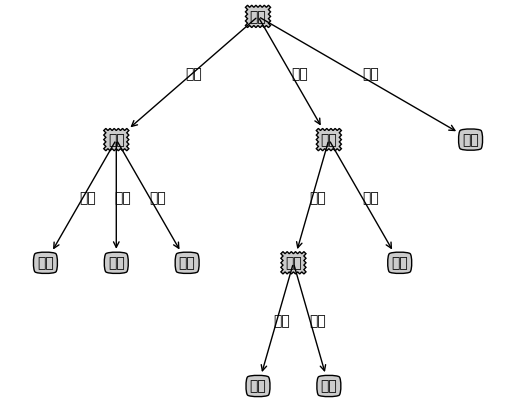

In [6]:
from math import log
import operator
import treePlotter
dataSet = [['青绿'	,'蜷缩'	,'浊响'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
           ['乌黑'	,'蜷缩'	,'沉闷'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
           ['乌黑'	,'蜷缩'	,'浊响'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
           ['青绿'	,'稍蜷'	,'浊响'	,'清晰'	,'稍凹'	,'软粘'	,'好瓜'],
           ['乌黑'	,'稍蜷'	,'浊响'	,'稍糊'	,'稍凹'	,'软粘'	,'好瓜'],
           ['青绿'	,'硬挺'	,'清脆'	,'清晰'	,'平坦'	,'软粘'	,'坏瓜'],
           ['浅白'	,'稍蜷'	,'沉闷'	,'稍糊'	,'凹陷'	,'硬滑'	,'坏瓜'],
           ['乌黑'	,'稍蜷'	,'浊响'	,'清晰'	,'稍凹'	,'软粘'	,'坏瓜'],
           ['浅白'	,'蜷缩'	,'浊响'	,'模糊'	,'平坦'	,'硬滑'	,'坏瓜'],
           ['青绿'	,'蜷缩'	,'沉闷'1	,'稍糊'	,'稍凹'	,'硬滑'	,'坏瓜']]
# dataSet = [['青绿'	,'蜷缩'	,'浊响'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
#            ['乌黑'	,'蜷缩'	,'沉闷'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
#            ['乌黑'	,'蜷缩'	,'浊响'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
#            ['青绿'	,'蜷缩'	,'沉闷'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
#            ['浅白'	,'蜷缩'	,'浊响'	,'清晰'	,'凹陷'	,'硬滑'	,'好瓜'],
#            ['青绿'	,'稍蜷'	,'浊响'	,'清晰'	,'稍凹'	,'软粘'	,'好瓜'],
#            ['乌黑'	,'稍蜷'	,'浊响'	,'稍糊'	,'稍凹'	,'软粘'	,'好瓜'],
#            ['乌黑'	,'稍蜷'	,'浊响'	,'清晰'	,'稍凹'	,'硬滑'	,'好瓜'],
#            ['乌黑'	,'稍蜷'	,'沉闷'	,'稍糊'	,'稍凹'	,'硬滑'	,'坏瓜'],
#            ['青绿'	,'硬挺'	,'清脆'	,'清晰'	,'平坦'	,'软粘'	,'坏瓜'],
#            ['浅白'	,'硬挺'	,'清脆'	,'模糊'	,'平坦'	,'硬滑'	,'坏瓜'],
#            ['浅白'	,'蜷缩'	,'浊响'	,'模糊'	,'平坦'	,'软粘'	,'坏瓜'],
#            ['青绿'	,'稍蜷'	,'浊响'	,'稍糊'	,'凹陷'	,'硬滑'	,'坏瓜'],
#            ['浅白'	,'稍蜷'	,'沉闷'	,'稍糊'	,'凹陷'	,'硬滑'	,'坏瓜'],
#            ['乌黑'	,'稍蜷'	,'浊响'	,'清晰'	,'稍凹'	,'软粘'	,'坏瓜'],
#            ['浅白'	,'蜷缩'	,'浊响'	,'模糊'	,'平坦'	,'硬滑'	,'坏瓜'],
#            ['青绿'	,'蜷缩'	,'沉闷'	,'稍糊'	,'稍凹'	,'硬滑'	,'坏瓜']]

A = ['色泽','根蒂','敲声','纹理','脐部','触感']

def isEqual(D):# 判断所有样本是否在所有的属性上取值相同
    for i in range(len(D)):#遍历样例
        for j in range(i+1,len(D)):#遍历之后的样例
            for k in range(len(D[i])-1):#遍历属性
                if D[i][k] != D[j][k]:
                    return False
                else:
                    continue
    return True

def mostClass(cList):
    classCount={}#计数器
    for className in cList:
        if className not in classCount.keys():
            classCount[className] = 0
        classCount[className] += 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
   # print(sortedClassCount[0][0])
    return sortedClassCount[0][0]

def Ent(dataSet):
    sampleNum = len(dataSet)#样例总数
    classCount = {}#类标签计数器
    for sample in dataSet:
        curLabel = sample[-1]#当前的类标签是样例的最后一列
        if curLabel not in classCount.keys():
            classCount[curLabel] = 0
        classCount[curLabel] += 1
    infoEnt = 0.0# 初始化信息熵
    for key in classCount.keys():
        prob = float(classCount[key])/sampleNum
        infoEnt -= prob * log(prob,2)
    return infoEnt


def splitD(dataSet,value,index):
    retDataSet = []
    for sample in dataSet:  # 遍历数据集，并抽取按axis的当前value特征进划分的数据集(不包括axis列的值)
        if sample[index] == value:  #
            reducedFeatVec = sample[:index]
            reducedFeatVec.extend(sample[index + 1:])
            retDataSet.append(reducedFeatVec)
            # print axis,value,reducedFeatVec
    if retDataSet == []:#如果为空集返回当前集合
        return dataSet
    return retDataSet


def chooseBestAttrToSplit(dataSet, DLenth):
    #属性数量
    attrsNum = len(dataSet[0])-1
    #print(range(attrsNum))
    #计算信息熵
    entD = Ent(dataSet)
    #计算信息增益率
    bestInfoGainRatio = 0.0
    bestAttr = -1
    infoGainList = []
    for i in range(attrsNum): #遍历每个样例的当前属性的属性值加入集合attrList
        attrList = [sample[i] for sample in dataSet]
        attrsValue = set(attrList)#转化为set，可以知道有几个不同的属性
        entDA = 0.0 # 初始化条件熵
        for value in attrsValue:#计算条件熵
            subDataSet = splitD(dataSet,value,i)#按属性值划分子集
            weight = len(subDataSet)/float(len(dataSet))#计算权重
            entDA += weight * Ent(subDataSet)
        infoGain = entD - entDA
        infoGainList.append({infoGain : i})#将当前属性计算得到的信息增益加入集合
    #print(infoGainList)
    #求信息增益的平均值
    sumInfoGain = 0
    for each in infoGainList:
        sumInfoGain += list(each.keys())[0]
    #计算信息增益的平均值
    averInfoGain = float(sumInfoGain)/len(infoGainList)
    #找出比平均信息增益大的信息增益
    greaterThenAverInfoGain = []
    for each in infoGainList:
        if list(each.keys())[0] >= averInfoGain:# 注意这里是">="号,因为信息增益可能相等
            greaterThenAverInfoGain.append(each)
    #从其中计算信息增益率最大的属性
    for i in greaterThenAverInfoGain:
        attrIndex = list(i.values())[0]#属性下标
        #print(attrIndex)
        attrList = [sample[attrIndex] for sample in dataSet]#当前属性对应的值全部加入集合
        attrsValue = set(attrList)#得到当前属性有几个不同的属性值
        #初始化属性固有值
        iva = 0.0
        #初始化信息增益
        entda = 0.0
        for value in attrsValue:  # 计算条件熵
            subDataSet = splitD(dataSet, value, attrIndex)  # 按属性值划分子集
            weight1 = len(subDataSet) / float(DLenth)  # 计算权重
            weight = len(subDataSet) / float(len(dataSet))  # 计算权重
            iva -= weight1 * log(weight1,2)
            entda += weight * Ent(subDataSet)
        infoGain = entD - entda
        #计算信息增益率
        gainRatio = float(infoGain)/iva
        #print("gainRatio"+str(gainRatio))
        #选取信息增益率最大的属性
        if(gainRatio > bestInfoGainRatio):
            bestInfoGainRatio = gainRatio
            bestAttr = attrIndex

   # print("bestAttr"+str(bestAttr))
    return bestAttr


def treeGenerate(D,A,Dlenth):
    #print(D)
    CnameList = [sample[-1] for sample in D]#遍历每一个样例，将每个样例的类标签组成一个集合
    if CnameList.count(CnameList[0]) == len(CnameList):#当结点包含的样本全属于同一类别，无需划分，直接返回类标签
        return CnameList[0]
    if len(A) == 0 or isEqual(D):#如果A为空集或者所有样本在所有属性上取值相同，则无法划分，返回所含样本最多的类别
        return mostClass(CnameList)
    #从A中选择最优的划分属性
    bestAttrIndex = chooseBestAttrToSplit(D,Dlenth) #获取最优属性下标
    bestAttrName = A[bestAttrIndex]#获取最优属性名字
    #使用字典存储树信息
    treeDict = {bestAttrName:{}}
    del(A[bestAttrIndex])# 删除已经选取的特征
    attrList = [sample[bestAttrIndex] for sample in D] #获取每个样例最佳划分属性的属性值列表
    attrsValue = set(attrList)
    for value in attrsValue:
        subA = A[:]
        if len(D) == 0:#如果子集D为空集则，返回父集中样本最多的类
            return mostClass(CnameList)
        else:
            treeDict[bestAttrName][value] = treeGenerate(splitD(D,value,bestAttrIndex),subA,Dlenth)
    return treeDict

tree = treeGenerate(dataSet,A,len(dataSet))
treePlotter.createPlot(tree)